In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 
from sklearn import datasets

#데이터 전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

#분류 모델 구축
from sklearn.tree import DecisionTreeClassifier# 결정트리
from sklearn.naive_bayes import GaussianNB #나이브 베이즈 
from sklearn.neighbors import KNeighborsClassifier #K - 최근접 이웃



# 데이터 가져오기

In [45]:
data = pd.read_csv('./RidingMowers.csv')
data.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [46]:
data.shape

(48, 3)

In [47]:
data.describe

<bound method NDFrame.describe of     Income  Lot_Size Ownership
0     60.0      18.4     Owner
1     85.5      16.8     Owner
2     64.8      21.6     Owner
3     61.5      20.8     Owner
4     87.0      23.6     Owner
5    110.1      19.2     Owner
6    108.0      17.6     Owner
7     82.8      22.4     Owner
8     69.0      20.0     Owner
9     93.0      20.8     Owner
10    51.0      22.0     Owner
11    81.0      20.0     Owner
12    58.0      18.4     Owner
13    83.5      16.8     Owner
14    62.8      21.6     Owner
15    59.5      20.8     Owner
16    85.0      23.6     Owner
17   112.1      19.2     Owner
18   110.0      17.6     Owner
19    84.8      22.4     Owner
20    71.0      20.0     Owner
21    95.0      20.8     Owner
22    53.0      22.0     Owner
23    83.0      20.0     Owner
24    75.0      19.6  Nonowner
25    52.8      20.8  Nonowner
26    64.8      17.2  Nonowner
27    43.2      20.4  Nonowner
28    84.0      17.6  Nonowner
29    49.2      17.6  Nonowner
30   

In [48]:
data.keys()

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

# 데이터 분리 

In [49]:
X=data.drop(['Ownership'], axis=1)
X.head()

,Income,Lot_Size
0,60.0,18.4
1,85.5,16.8
2,64.8,21.6
3,61.5,20.8
4,87.0,23.6


In [50]:
y= data['Ownership']
y.head()

0    Owner
1    Owner
2    Owner
3    Owner
4    Owner
Name: Ownership, dtype: object

# 데이터 전처리
문자형 자료를 숫자(범주형)로 인코딩<br>
숫자형 자료를 표준화<br>
결정나무, 랜덤 포레스트, 나이브 베이즈 분류 : 원본데이터 그대로 유지

In [51]:
class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

# 훈련/검증용 데이터 분할 

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

In [53]:
x_train

,Income,Lot_Size
2,64.8,21.6
21,95.0,20.8
44,49.4,16.4
34,51.0,14.0
25,52.8,20.8
11,81.0,20.0
37,50.8,20.8
15,59.5,20.8
16,85.0,23.6
8,69.0,20.0


# 모델 구축

In [55]:
tree = DecisionTreeClassifier(criterion='gini', max_depth =1, random_state=1)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

# 모델 검정
tree.predict (class로 표시)<br>
tree.predict_proba (확률값으로 표시)

In [56]:
y_predict = tree.predict(x_test)
y_predict

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [58]:
y_pred_pro = tree.predict_proba(x_test)
y_pred_pro

array([[0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ]])

In [59]:
## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

In [60]:
#오차행렬
confu_r= pd.DataFrame(confusion_matrix(y_test, y_predict), index=['True[0]','True[1]'], columns=['pred[0]','pred[1]'])

In [61]:
confu_r

,pred[0],pred[1]
True[0],5,2
True[1],3,5


In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.71      0.62      0.67         8

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15



## 정확도 민감도 확인 

# 의사결정나무

In [64]:
# 기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

# 데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

# 데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

# 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

# 분류모델구축
from sklearn.tree import DecisionTreeClassifier # 결정 트리


# 모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

# 최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

In [78]:
bank_df = pd.read_csv('./UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [79]:
bank_df.shape

(5000, 14)

In [80]:
bank_df.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [81]:
X = bank_df.drop(['ID','ZIPCode','PersonalLoan'], axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [82]:
y =bank_df['PersonalLoan']
y.head()
print(y.shape)
print(type(y))
print(np.bincount(y))

(5000,)
<class 'pandas.core.series.Series'>
[4520  480]


## 데이터 전처리
문자형 자료를 숫자(범주형)로 인코딩 -> 범주형 변수를 가변수로 처리 : One Hot Encording<br>
숫자형 자료를 표준화<br>
단, 결정나무, 랜덤 포레스트, 나이브 베이즈 분류 : 원본데이터 그대로 유지<br>
가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움<br>

In [83]:
X['Education'] = X['Education'].replace([1,2,3], ['Under','Grad','Prof'])

In [84]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,Under,0,1,0,0,0
1,45,19,34,3,1.5,Under,0,1,0,0,0
2,39,15,11,1,1.0,Under,0,0,0,0,0
3,35,9,100,1,2.7,Grad,0,0,0,0,0
4,35,8,45,4,1.0,Grad,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,Prof,0,0,0,1,0
4996,30,4,15,4,0.4,Under,85,0,0,1,0
4997,63,39,24,2,0.3,Prof,0,0,0,0,0
4998,65,40,49,3,0.5,Grad,0,0,0,1,0


In [85]:
X = pd.get_dummies(X[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 
                      'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']],
                   columns=['Education'],
                   drop_first = True)

In [86]:
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,Education_Prof,Education_Under
0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,1,0,0


## 훈련/검증용 데이터 분할 

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)


## 모델 구축

In [88]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

## 모델검정 

In [89]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [91]:
confu_mat = pd.DataFrame(confusion_matrix(y_test, y_predict), index = ['True[0]','True[1]'], columns=['pred[0]', 'pred[1]'])
confu_mat

,pred[0],pred[1]
True[0],1347,9
True[1],19,125


In [92]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [96]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_predict).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_predict))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_predict))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_predict))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_predict))

잘못 분류된 샘플 개수: 28
정확도: 0.981
정밀도: 0.933
재현율: 0.868
F1: 0.899


## ROC 곡선 그리기 

In [99]:
# fpr, tpr, thresholds = roc_curve(y_test, tree.decision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])

In [100]:
fpr, tpr, thresholds

(array([0.        , 0.00663717, 1.        ]),
 array([0.        , 0.86805556, 1.        ]),
 array([2., 1., 0.]))

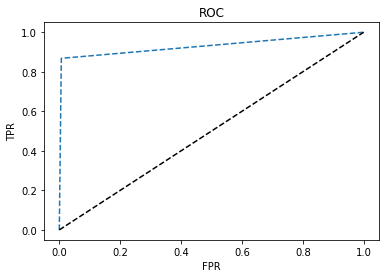

In [101]:
plt.plot(fpr, tpr, '--', label="Decision Tree")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# 나이브베이즈(질적자료변환) 

In [102]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축 (3장.p.83~130)
# from sklearn.tree import DecisionTreeClassifier # 결정 트리
from sklearn.naive_bayes import GaussianNB # 나이브 베이지안 (실수형)
from sklearn.naive_bayes import MultinomialNB # 나이브 베이지안(정수형)
from sklearn.naive_bayes import BernoulliNB # 나이브 베이지안(바이너리형(0,1))


## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 데이터 가져오기 

In [135]:
delay_df = pd.read_csv('./FlightDelays.csv')
delay_df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FlightStatus
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,THU,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,THU,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,THU,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,THU,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,THU,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,SAT,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,SAT,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,SAT,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,SAT,31,N16961,ontime


In [136]:
delay_df.keys()

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'FlightStatus'],
      dtype='object')

In [137]:
X = delay_df.iloc[:,[9,0,7,3,1]]
X.head()

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER
0,THU,1455,BWI,JFK,OH
1,THU,1640,DCA,JFK,DH
2,THU,1245,IAD,LGA,DH
3,THU,1715,IAD,LGA,DH
4,THU,1039,IAD,LGA,DH


In [138]:
y = delay_df.iloc[:,[12]]
y['FlightStatus'].value_counts()

ontime     1773
delayed     428
Name: FlightStatus, dtype: int64

## 데이터 전처리 

In [139]:
#CRS_DEP_TIME : 출발예정시간
X['CRS_DEP_TIME'] = X['CRS_DEP_TIME'].astype('category')
X.dtypes

C:\Users\admin\AppData\Local\Temp/ipykernel_5292/3331462031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CRS_DEP_TIME'] = X['CRS_DEP_TIME'].astype('category')


DAY_WEEK          object
CRS_DEP_TIME    category
ORIGIN            object
DEST              object
CARRIER           object
dtype: object

In [140]:
X.groupby('DAY_WEEK').size()

DAY_WEEK
FRI    391
MON    308
SAT    250
SUN    253
THU    372
TUE    307
WEN    320
dtype: int64

In [141]:
X.groupby('CRS_DEP_TIME').size()

CRS_DEP_TIME
600      26
630      57
640      22
645      21
700      92
730      24
735      17
759       2
800      40
830      26
840      62
845       3
850      31
900      77
925       3
930      28
1000     23
1030     56
1039      6
1040     15
1100     48
1130     20
1200     22
1230     28
1240     31
1245     61
1300    109
1315      4
1330     19
1359     25
1400     46
1430     52
1455    138
1500     77
1515      5
1520      1
1525     21
1530     50
1600     45
1605      1
1610     24
1630     51
1640     27
1645     30
1700     74
1710     28
1715     61
1720     27
1725      1
1730     50
1800     27
1830     58
1900     99
1930     20
2000     22
2030     31
2100     45
2120     90
2130      2
dtype: int64

In [142]:
X = pd.get_dummies(X[['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']], drop_first=True)

In [143]:
X.head()

,DAY_WEEK_MON,DAY_WEEK_SAT,DAY_WEEK_SUN,DAY_WEEK_THU,DAY_WEEK_TUE,DAY_WEEK_WEN,CRS_DEP_TIME_630,CRS_DEP_TIME_640,CRS_DEP_TIME_645,CRS_DEP_TIME_700,...,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0


In [151]:
y = y.replace (['ontime','delayed'], [0,1])
y.head()


class_le = LabelEncoder()

y = class_le.fit_transform(y)
y

C:\Users\admin\anaconda3\envs\tfenv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 훈련/검증용 데이터 분할 

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1, stratify=y)


In [153]:
ber= BernoulliNB(alpha=1.0, class_prior = None, fit_prior=True)
ber.fit(x_train, y_train)

BernoulliNB()

In [154]:
y_predict = ber.predict(x_test)

##  검정

In [155]:
confu = pd.DataFrame(confusion_matrix(y_test, y_predict), index=['True[0]','True[1]'], columns=['pred[0]','pred[1]'])

In [156]:
confu

,pred[0],pred[1]
True[0],473,59
True[1],104,25


In [157]:
print('Classification Report')
print(classification_report(y_test, y_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       532
           1       0.30      0.19      0.23       129

    accuracy                           0.75       661
   macro avg       0.56      0.54      0.54       661
weighted avg       0.72      0.75      0.73       661



In [158]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_predict).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_predict))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_predict))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_predict))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_predict))

잘못 분류된 샘플 개수: 163
정확도: 0.753
정밀도: 0.298
재현율: 0.194
F1: 0.235
